# Visualizing MNIST using t-SNE

The objective of this Notebook is to visualize the MNIST data set in two and three dimensions, using the projection onto this lower dimensional spaces given by the technique t-SNE.


In [19]:
#Imports and a little bit of setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mnist import MNIST
import math

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments providedb
jtplot.style(theme = 'default')
#jtplot.style()

#A little bit of matplotlib magic so that the images can be showed on the IPython notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Small function that helps displays images
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

In [2]:
#Imports the data and converts it to numpy arrays
mndata = MNIST('../python-mnist/data')
X, labels = mndata.load_testing()

#converts to numpy array
X = np.array(X)
labels = np.array(labels)

subsample_idices = np.random.choice(X.shape[0], 5000)
X = X[subsample_idices,:]
labels = labels[subsample_idices]

#Converts to binary the selcted sample
X = np.around(1-(X/255))

N, D = X.shape

#Declares the cmap for coloring
#COlors
selected_colors = ['red','greenyellow','blue','pink','yellow','orange',
                   'lightcyan','darkolivegreen', 'brown','purple']
cmap = plt.cm.jet
# create the new map
cmap = cmap.from_list('Custom cmap', selected_colors, 10)


In [3]:
#Imports the data and converts it to numpy arrays
mndata = MNIST('../python-mnist/data')
X, labels = mndata.load_testing()

#converts to numpy array
X = np.array(X)
labels = np.array(labels)

X = X[np.isin(labels,[1,2,3]),]
labels = labels[np.isin(labels,[1,2,3]),]

#Converts to binary the selcted sample
X = np.around(1-(X/255))

N, D = X.shape

#Declares the cmap for coloring
#COlors
selected_colors = ['red','greenyellow','blue','pink','yellow','orange',
                   'lightcyan','darkolivegreen', 'brown','purple']
cmap = plt.cm.jet
# create the new map
cmap = cmap.from_list('Custom cmap', selected_colors, 10)

X.shape


(3177, 784)

# t-SNE

This authors of this technique offer a free python implementation on their website: *https://lvdmaaten.github.io/tsne/*. The script was downloaded and is imported into this notebook (some small syntax changes where made for it to run on python3)

In [16]:
from tsne import *

### Two Dimensional t-SNE

In [17]:
#runs t-SNE
#2 dimensions
Y = tsne(X, 2, 50, 20.0);

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  3177 ...
Computing P-values for point  500  of  3177 ...
Computing P-values for point  1000  of  3177 ...
Computing P-values for point  1500  of  3177 ...
Computing P-values for point  2000  of  3177 ...
Computing P-values for point  2500  of  3177 ...
Computing P-values for point  3000  of  3177 ...
Mean value of sigma:  1.81171598993
Iteration  10 : error is  24.8248814318
Iteration  20 : error is  23.0189924036
Iteration  30 : error is  19.9507348556
Iteration  40 : error is  18.7712307741
Iteration  50 : error is  18.3985943038
Iteration  60 : error is  18.2898532332
Iteration  70 : error is  18.1948783195
Iteration  80 : error is  17.9715635883
Iteration  90 : error is  17.8288994834
Iteration  100 : error is  17.7566937397
Iteration  110 : error is  2.70659436069
Iteration  120 : error is  2.48668093626
Iteration  130 : error is  2.30852862159
Iteration  140 : error is  2.1626

In [57]:
Z = np.append(Y,np.reshape(labels, (len(labels),1)), axis = 1)
W = pd.DataFrame(Z, columns = ['Y1','Y2','label'])

#np.savetxt("mnist_three_digits_t_sne.csv", Z, 
#           delimiter=",", 
#           header = "Y1,Y2,label")

W['label'][labels == 1] = 'one'
W['label'][labels == 2] = 'two'
W['label'][labels == 3] = 'three'

W.to_csv('mnist_three_digits_t_sne.csv')

In [2]:
#Plots the result
plt.scatter(Y[:,0], Y[:,1], c=labels)
#plt.axis('off')
plt.grid(True)
plt.title('Visualizing 2000 MNIST sample using t-SNE')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.tick_params(         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    right = 'off',
    left = 'off',
    labeltop = 'off', 
    labelleft = 'off', 
    labelright = 'off',
    labelbottom='off') 
plt.colorbar()
plt.show()


NameError: name 'plt' is not defined

### Compare with Two Dimensional PCA

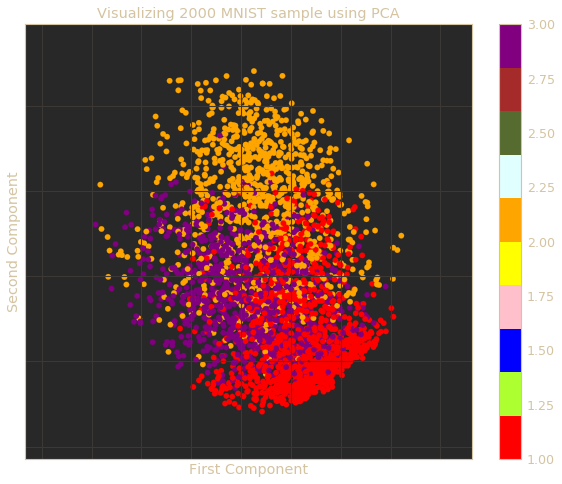

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.T)

Z = pca.components_.T

#Plots the result
plt.scatter(Z[:,0], Z[:,1], c=labels, cmap=cmap)
#plt.axis('off')
plt.grid(True)
plt.title('Visualizing 2000 MNIST sample using PCA')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.tick_params(         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    right = 'off',
    left = 'off',
    labeltop = 'off', 
    labelleft = 'off', 
    labelright = 'off',
    labelbottom='off') 
plt.colorbar()
plt.show()

(3177, 784)

### Three Dimensional t-SNE

In [ ]:
#Now with three dimensions
Y3 = tsne(X, 3, 50, 20.0);

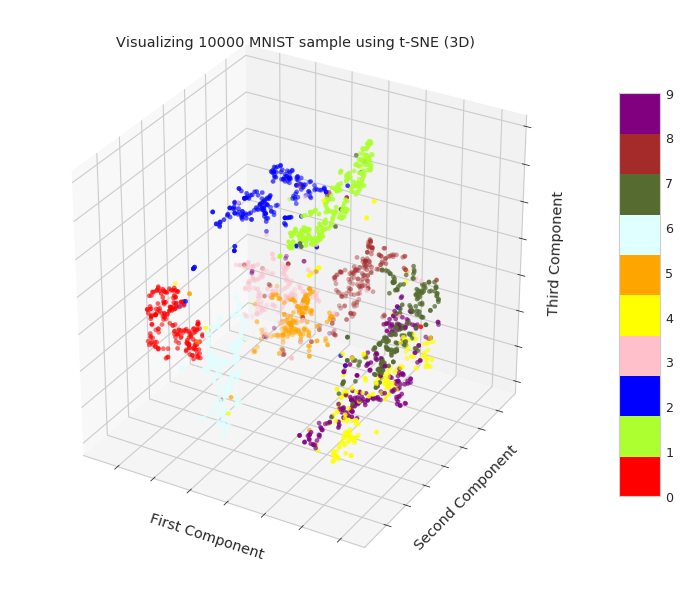

In [25]:
#Plots the result
fig = plt.figure()
ax = Axes3D(fig)
sca = ax.scatter(Y3[:,0], Y3[:,1], Y3[:,2], c=labels, cmap=cmap)
ax.set_title('Visualizing 10000 MNIST sample using t-SNE (3D)')
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.tick_params(         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    right = 'off',
    left = 'off',
    labeltop = 'off', 
    labelleft = 'off', 
    labelright = 'off',
    labelbottom='off') 
fig.colorbar(sca, shrink=0.7, aspect=10)

plt.show()

### Compare with Three Dimensional PCA

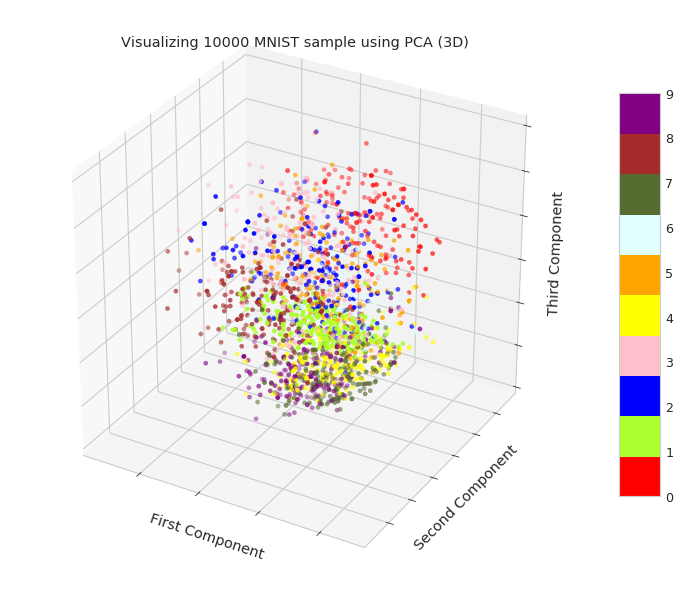

In [27]:
pca = PCA(n_components=3)
pca.fit(X.T)

Z = pca.components_.T

#Plots the result
fig = plt.figure()
ax = Axes3D(fig)
sca = ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=labels, cmap=cmap)
ax.set_title('Visualizing 10000 MNIST sample using PCA (3D)')
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.tick_params(         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    right = 'off',
    left = 'off',
    labeltop = 'off', 
    labelleft = 'off', 
    labelright = 'off',
    labelbottom='off') 
fig.colorbar(sca, shrink=0.7, aspect=10)

plt.show()

## Now With Fashion MNIST
We know apply the same procedure but using the fashion MNIST data set

In [4]:
#Imports the data and converts it to numpy arrays
mndata = MNIST('../fashion-mnist/data')
X, labels = mndata.load_testing()

#converts to numpy array
X = np.array(X)
labels = np.array(labels)

#subsample_idices = np.random.choice(X.shape[0], 2000)
#X = X[subsample_idices,:]
#labels = labels[subsample_idices]

#Converts to binary the selcted sample

N, D = X.shape

#Declares the cmap for coloring
#COlors
selected_colors = ['red','greenyellow','blue','pink','yellow','orange',
                   'lightcyan','darkolivegreen', 'brown','purple']
cmap = plt.cm.jet
# create the new map
cmap = cmap.from_list('Custom cmap', selected_colors, 10)


## Some Examples

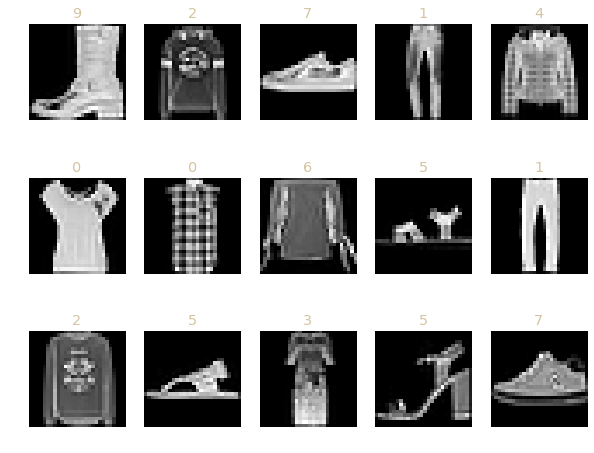

In [17]:
n_row = 3
n_col = 5
for i in range(n_row*n_col):
    ran = np.random.randint(N)
    plt.subplot(n_row, n_col, i+1)
    imshow_noax(X[ran].reshape(28,28), normalize=False)
    plt.title(str(labels[ran]))
plt.show()

## Three Dimensional t-SNE

In [23]:
X = np.around(1-(X/255))
#Now with three dimensions
Y3 = tsne(X, 3, 50, 20.0);

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  10000 ...
Computing P-values for point  500  of  10000 ...
Computing P-values for point  1000  of  10000 ...
Computing P-values for point  1500  of  10000 ...
Computing P-values for point  2000  of  10000 ...
Computing P-values for point  2500  of  10000 ...
Computing P-values for point  3000  of  10000 ...
Computing P-values for point  3500  of  10000 ...
Computing P-values for point  4000  of  10000 ...
Computing P-values for point  4500  of  10000 ...
Computing P-values for point  5000  of  10000 ...
Computing P-values for point  5500  of  10000 ...
Computing P-values for point  6000  of  10000 ...
Computing P-values for point  6500  of  10000 ...
Computing P-values for point  7000  of  10000 ...
Computing P-values for point  7500  of  10000 ...
Computing P-values for point  8000  of  10000 ...
Computing P-values for point  8500  of  10000 ...
Computing P-values for point  9000  

### Shows The Coordinates

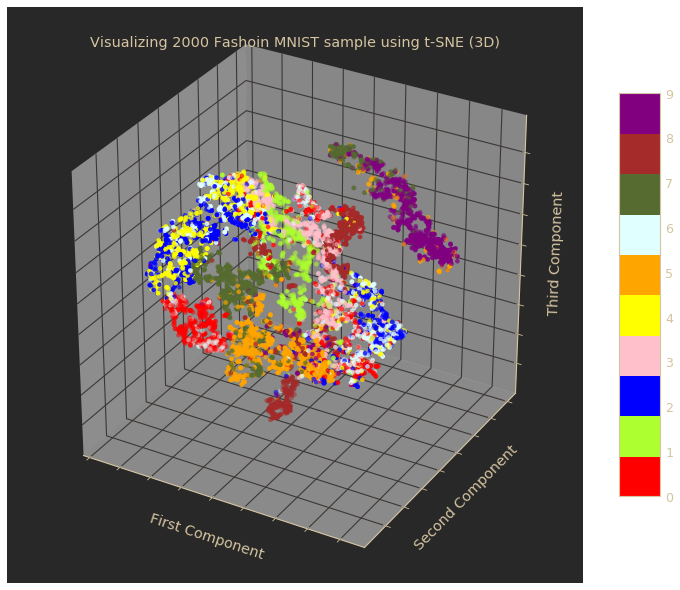

In [24]:
#Plots the result
fig = plt.figure()
ax = Axes3D(fig)
sca = ax.scatter(Y3[:,0], Y3[:,1], Y3[:,2], c=labels, cmap=cmap)
ax.set_title('Visualizing 2000 Fashoin MNIST sample using t-SNE (3D)')
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.tick_params(         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    right = 'off',
    left = 'off',
    labeltop = 'off', 
    labelleft = 'off', 
    labelright = 'off',
    labelbottom='off') 
fig.colorbar(sca, shrink=0.7, aspect=10)

plt.show()

### Saves The Coordinates

In [26]:
head = 'Y1, Y2, Y3'
np.savetxt("tsne_fashion.csv", 
           Y3, 
           delimiter=",", 
           header = head)

## Recovered Variance Analysis

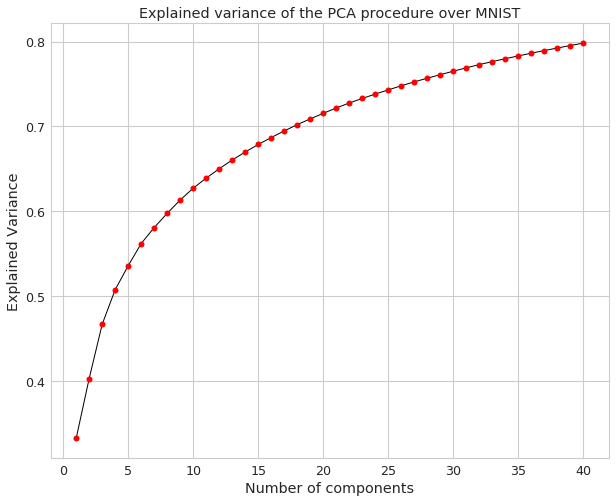

In [32]:
from sklearn.decomposition import PCA

max_dim = 40

x_axis = range(1,max_dim + 1)
y_axis = []

for i in range(1,max_dim + 1):
    pca = PCA(n_components=i)
    pca.fit(X.T)
    y_axis.append(np.sum(pca.explained_variance_ratio_))
    
plt.plot( x_axis, y_axis, marker='o', markerfacecolor='red', markersize=6, color='black', linewidth=1)
plt.title('Explained variance of the PCA procedure over MNIST')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.show()

In [29]:
pca = PCA(n_components=3)
pca.fit(X.T)
np.sum(pca.explained_variance_ratio_)

0.46682487623752444